In [2]:
import keras
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.applications.imagenet_utils import decode_predictions

import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Pre-trained Model

In [3]:
inception_model = inception_v3.InceptionV3(weights='imagenet')

In [4]:
inception_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

batch_normalization_24 (BatchNo (None, None, None, 9 288         conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation_21 (Activation)      (None, None, None, 4 0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
activation_24 (Activation)      (None, None, None, 9 0           batch_normalization_24[0][0]     
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, None, None, 2 0           mixed1[0][0]                     
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, None, None, 6 18432       mixed1[0][0]                     
__________________________________________________________________________________________________
conv2d_22 

In [6]:
from keras.utils.vis_utils import plot_model

# create a plot of the layers in the Inception model
plot_model(inception_model, to_file='./images/inception_model.png')

## Load Image

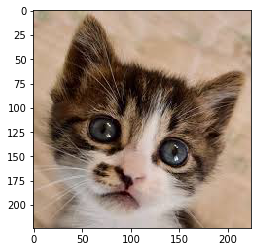

Original image size:  (224, 224)


In [7]:
image_path = './images/cat.jpeg' # cat, dog, horse, duck, bfly, tomato, corn, grape
original_image = load_img(image_path, target_size=(224, 224))
plt.imshow(original_image)
plt.show()
print('Original image size: ', original_image.size)

In [8]:
# convert the image to a numpy array
numpy_image = img_to_array(original_image)
# plt.imshow(np.uint8(numpy_image))
# plt.show()
print('Numpy image size: ', numpy_image.shape)

# convert the image into batch format
batch_image = np.expand_dims(numpy_image, axis=0)
# plt.imshow(np.uint8(batch_image[0]))
# plt.show()
print('Batch image size: ', batch_image.shape)

Numpy image size:  (224, 224, 3)
Batch image size:  (1, 224, 224, 3)


Once we have the image in the right format, we can feed it to the network and get the predictions.

## Predict the Image

In [9]:
# prepare the image for the VGG model
inception_processed_image = inception_v3.preprocess_input(batch_image.copy())

In [10]:
# get the predicted probabilities for each class
inception_predictions = inception_model.predict(inception_processed_image)

# we will get top 5 predictions which is the default
predictions_list = {'inception_predictions': inception_predictions}

In [11]:
for key, value in predictions_list.items():
    predicted_label = decode_predictions(value)
    print('Prediction: ', key)
    print(predicted_label)
    print('---')

Prediction:  inception_predictions
[[('n02123045', 'tabby', 0.8595175), ('n02124075', 'Egyptian_cat', 0.12595922), ('n02123159', 'tiger_cat', 0.013076362), ('n02127052', 'lynx', 0.000443336), ('n02123394', 'Persian_cat', 0.00011324551)]]
---


<hr/>